In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
memops = {'scal':2, 'axpby':3, 'pointwiseDot':6, 'dot':2, 'dx':3, 'dy':3,
         'arakawa':34, 'cg':42}

In [34]:
#read in csv file
df1 = pd.read_csv('benchmark_knl_mpi1.csv', delimiter=' ')
#add size and get rid of non-relevant columns
df1.insert(0,'size', 8*df1['n']*df1['n']*df1['Nx']*df1['Ny']/1e6)
for name, mem in memops.items():
    df1[name] = df1['size']/1000*mem/df1[name]
dfr = df1[['n','Nx','Ny','size']+list(memops.keys())]
dfr[(dfr['n']==3) & (dfr['Nx']==544)]

,n,Nx,Ny,size,scal,dot,dx,arakawa,pointwiseDot,axpby,dy,cg
11,3,544,544,21.31,1204.44,99.67,181.88,233.99,394.81,542.03,178.96,225.40
43,3,544,544,21.31,1212.04,100.82,180.33,238.52,394.77,531.75,201.92,232.33
75,3,544,544,21.31,699.18,98.15,174.80,233.77,405.88,456.17,196.36,230.53
107,3,544,544,21.31,1305.62,103.20,187.53,233.49,387.80,533.35,211.07,230.61
139,3,544,544,21.31,1222.15,100.21,174.12,237.59,395.45,428.52,192.36,224.47
171,3,544,544,21.31,1233.02,100.45,176.03,235.87,395.72,520.84,187.41,225.83
203,3,544,544,21.31,1210.64,94.74,176.03,227.19,382.42,363.55,195.76,223.94
235,3,544,544,21.31,1216.16,96.93,175.96,224.14,400.84,540.29,197.07,210.79
267,3,544,544,21.31,1216.49,103.98,183.73,234.24,384.04,533.81,202.68,231.67
299,3,544,544,21.31,1177.54,97.37,175.51,224.49,400.18,501.86,198.72,191.89


In [8]:
#compute mean and standard derivation of 'same' groups 
dfr=dfr.groupby(['n', 'Nx','Ny','size']).agg(['mean', 'std'])
dfr=dfr.reset_index(level=['n','Nx','Ny','size'])

In [15]:
#dfr['axpby']

In [16]:
base_bandwidth = dfr[('axpby','mean')].iloc[15] # base bandwidth at 3 2048 2048 
for name, mem in memops.items():
    dfr[(name,'eff')]= dfr[(name,'mean')]/base_bandwidth
    dfr[(name,'eff_err')]=dfr[(name,'std')]/base_bandwidth
#now display all bandwidth results

In [17]:
cols=[(m,'eff') for m in memops.keys()]
efficiency=dfr[['n','Nx','Ny','size']].join( dfr[cols])
cols=[(m,'eff_err') for m in memops.keys()]
efficiency=efficiency.join( dfr[cols])
#dfr=dfr.sort_values(by='size')
#efficiency=efficiency.set_index('size')

In [18]:
pd.set_option('precision',2)
efficiency=efficiency.sort_values(by='size')
#efficiency.loc[:,'size']
efficiency.iloc[0:8]

,n,Nx,Ny,size,scal,dot,dx,arakawa,pointwiseDot,axpby,dy,cg,scal,dot,dx,arakawa,pointwiseDot,axpby,dy,cg
,,,,,eff,eff,eff,eff,eff,eff,eff,eff,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err
0,2,136,136,0.59,0.15,0.04,0.13,0.29,0.60,0.29,0.23,0.17,0.02,1.58e-03,0.03,5.54e-03,0.07,0.04,1.07e-02,3.04e-03
8,3,136,136,1.33,0.45,0.07,0.21,0.43,1.29,0.57,0.31,0.28,0.10,2.90e-03,0.03,1.22e-02,0.03,0.13,8.29e-03,1.76e-02
1,2,272,272,2.37,0.70,0.11,0.33,0.62,1.70,0.92,0.45,0.39,0.07,2.47e-03,0.02,1.62e-02,0.04,0.05,1.40e-02,6.67e-03
16,4,136,136,2.37,0.55,0.11,0.26,0.44,1.75,0.93,0.27,0.31,0.23,5.99e-03,0.04,9.91e-03,0.05,0.05,2.51e-02,9.39e-03
24,5,136,136,3.70,0.90,0.14,0.28,0.36,2.29,1.29,0.24,0.29,0.18,7.08e-03,0.03,1.58e-02,0.09,0.07,2.12e-02,5.71e-03
2,2,408,408,5.33,1.25,0.16,0.45,0.64,2.19,1.54,0.57,0.45,0.11,5.02e-03,0.06,1.53e-02,0.09,0.12,2.14e-02,8.32e-03
9,3,272,272,5.33,1.26,0.17,0.36,0.52,2.26,1.60,0.44,0.40,0.12,5.71e-03,0.04,2.64e-02,0.20,0.10,2.79e-02,1.12e-02
3,2,544,544,9.47,1.83,0.20,0.54,0.56,0.89,2.04,0.59,0.50,0.09,1.65e-02,0.04,1.43e-02,0.03,0.08,7.61e-02,2.36e-02


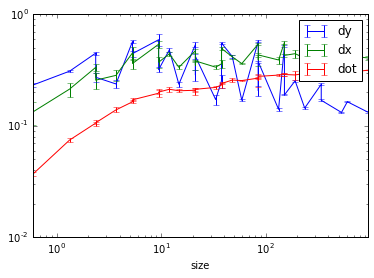

In [19]:
fig=plt.figure()
ax = efficiency['dy'].plot(style='ro',x=efficiency.loc[:,'size'],y='eff',yerr='eff_err')
ax = efficiency['dx'].plot(style='ro',x=efficiency.loc[:,'size'],y='eff',yerr='eff_err',ax=ax)
ax = efficiency['dot'].plot(style='ro',x=efficiency.loc[:,'size'],y='eff',yerr='eff_err',ax=ax)
plt.xscale('log')
plt.yscale('log')
ax.legend(['dy','dx','dot'])

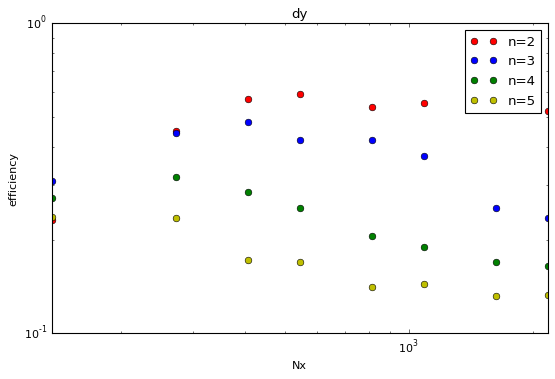

467.80277739108169

In [22]:
fig,ax=plt.subplots(1,1,figsize=(8,5),dpi= 80, facecolor='w', edgecolor='k')
plotlist = [('dy','eff')]
stylelist = ['ro','bo','go','yo']
#efficiency.iloc[8:24].plot(x=('size',''),y=[('cg','eff'),('arakawa','eff')],style=['ro','bo'],logx=True)
efficiency[efficiency['n']==2].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[0])
efficiency[efficiency['n']==3].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[1])
efficiency[efficiency['n']==4].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[2])
efficiency[efficiency['n']==5].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[3])
#plt.loglog()
plt.title(plotlist[0][0])
plt.xscale('log')
plt.yscale('log')
plt.ylabel('efficiency')
plt.xlabel('Nx')
plt.legend(['n=2','n=3','n=4','n=5'])
plt.show()
base_bandwidth